In [ ]:
# task: clean, transform, and do basic exploratory analysis on the olympics data set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read in the data
df = pd.read_csv('olympics_08_medalists.csv')
# df.info()
# df.head()


Step 1: import necessary libraries and data

In [ ]:

# Reshape the data: Converting wide format to long format
df_melted = df.melt(id_vars=["medalist_name"], var_name="sport_gender", value_name="medal")

# Drop rows where 'medal' is NaN
df_melted.dropna(subset=["medal"], inplace=True)

# Split 'sport_gender' into 'gender' and 'sport'
df_melted["gender"] = df_melted["sport_gender"].apply(lambda x: "female" if "female_" in x else "male")
df_melted["sport"] = df_melted["sport_gender"].str.replace("male_", "").str.replace("female_", "")

# Drop the original 'sport_gender' column
df_tidy = df_melted.drop(columns=["sport_gender"])

# make sure the data types are correct
df_tidy['sport'] = df_tidy['sport'].astype(str)
df_tidy['gender'] = df_tidy['gender'].astype(str)
df_tidy['medal'] = df_tidy['medal'].astype(str)

# Display cleaned dataset
display(df_tidy.head())


Step 2: tidy data

I used the melt function to reshape the data, keeping the athletes' names as the identifier. Sport_gender is a combination combo with both sports and genders that I then split into two columns. To do so I isolated the strings for male and female, and then dropped the sport_gender column altogether. I also dropped the rows that have missing values from medal because those aren't helpful for these visualizations. I ensured that the data types are correct ie that they are all strings so that they are easy for me to use later. Then I displayed a small portion of the data to ensure what I had done worked. This cleaned the data so that the variables I am interested in match the column names and each event (the observations) has its own row.

/var/folders/2n/5rdvpcg91b3_fsrwsmw_1_xr0000gn/T/ipykernel_43976/4074774577.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports.index, y=top_sports.values, palette="viridis")


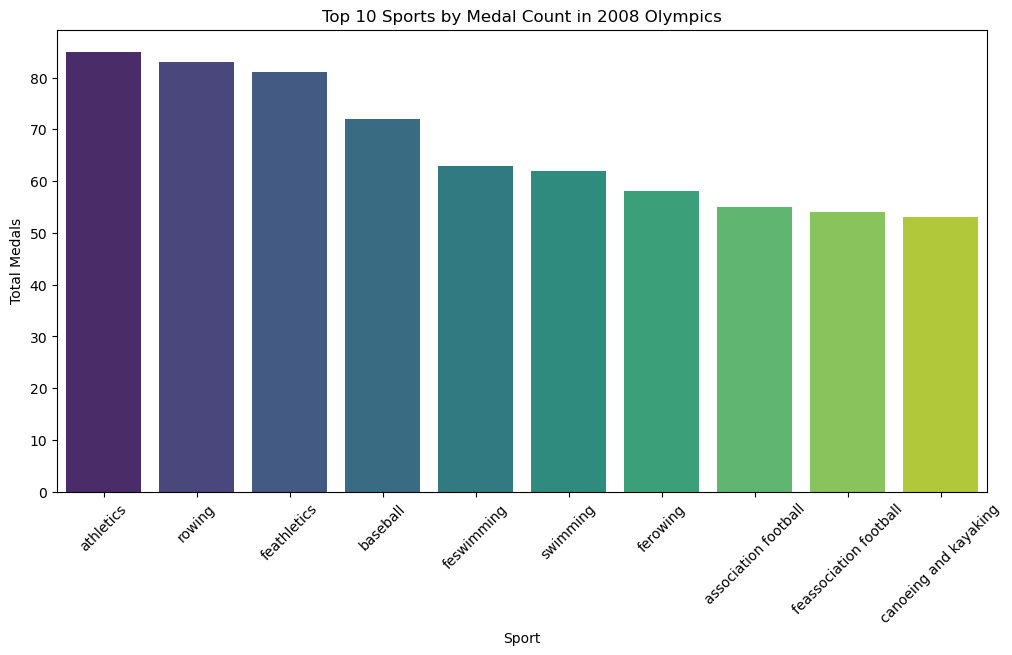

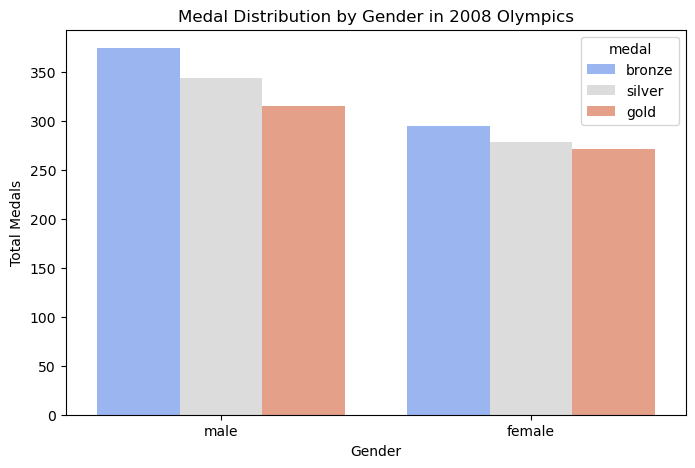

medal,bronze,gold,silver,Total
sport,,,,
athletics,29,25,31,85
rowing,27,28,28,83
feathletics,26,27,28,81
baseball,24,24,24,72
feswimming,22,21,20,63
swimming,21,18,23,62
ferowing,18,20,20,58
association football,18,19,18,55
feassociation football,18,18,18,54


In [27]:
# Top 10 sports with most medals
plt.figure(figsize=(12, 6))
top_sports = df_tidy["sport"].value_counts().head(10)
sns.barplot(x=top_sports.index, y=top_sports.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Sport")
plt.ylabel("Total Medals")
plt.title("Top 10 Sports by Medal Count in 2008 Olympics")
plt.show()

# Medal count by gender
plt.figure(figsize=(8, 5))
sns.countplot(data=df_tidy, x="gender", hue="medal", palette="coolwarm")
plt.xlabel("Gender")
plt.ylabel("Total Medals")
plt.title("Medal Distribution by Gender in 2008 Olympics")
plt.show()

# Pivot Table: Aggregating medal counts by sport and medal type
pivot_medals = df_tidy.pivot_table(index="sport", columns="medal", aggfunc="size", fill_value=0)

# Adding a total column for sorting
pivot_medals["Total"] = pivot_medals.sum(axis=1)

# Sorting by total medals
pivot_medals = pivot_medals.sort_values(by="Total", ascending=False)

# Display top 10 sports by total medals
display(pivot_medals.head(10))

Step 3: displaying the data

My first visualization is a bar chart. This bar chart displays the top 10 sports that awarded the most medals during the 2008 Olympics. The x-axis represents the sports, while the y-axis shows the total count of medals won in each sport.

My second visualization shows the distribution of medals between male and female athletes. It helps in understanding gender participation and success in the 2008 Olympics.

Lastly, the pivot table summarizes the number of medals won by each sport, categorizing them by medal type (Gold, Silver, Bronze). A "Total" column is added to rank sports by their total medal count, displaying the top 10 sports. This aggregate helps someone unfamiliar with the data get a better sense of its content overall.